Welcome to the Escape Room Game!
Enter the size of the maze (e.g., 10 for a 10x10 maze): 4
Enter the number of obstacles (max 14): 2
Maze generated! Finding path using A* algorithm...


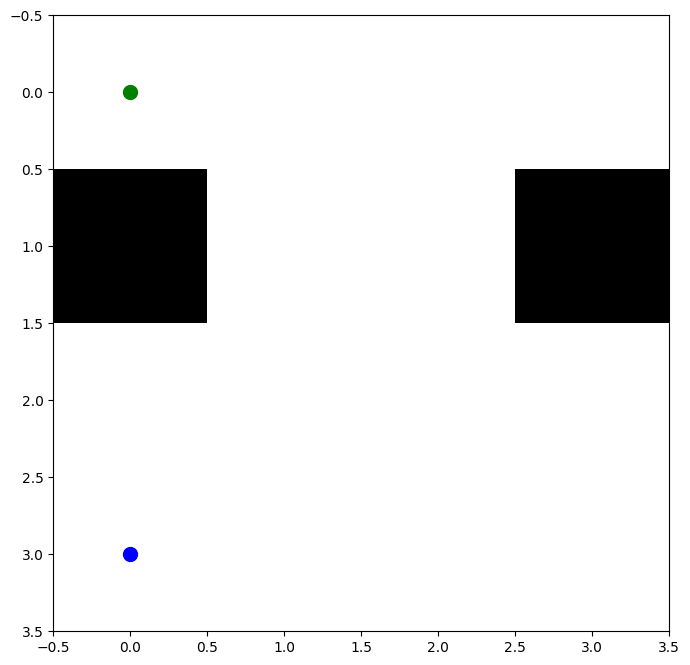

Path found! The path is: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0)]


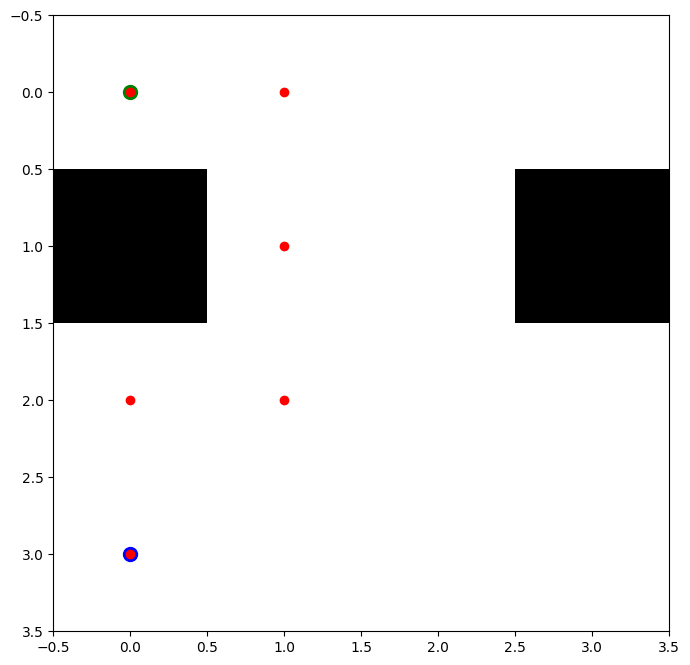

In [1]:
import heapq
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the directions: up, down, left, right
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Helper function to draw the maze and path, showing start and end
def draw_maze(maze, path=None, start=None, end=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='gray_r')

    # Mark the start point in green
    if start:
        plt.plot(start[1], start[0], 'go', markersize=10)  # Green dot for start

    # Mark the end point in blue
    if end:
        plt.plot(end[1], end[0], 'bo', markersize=10)  # Blue dot for end

    # Draw the path in red
    if path:
        for (x, y) in path:
            plt.plot(y, x, 'ro')  # Red dot for path

    plt.show()

# A* Algorithm implementation
def a_star(maze, start, end):
    rows, cols = maze.shape
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == end:
            return reconstruct_path(came_from, current)

        for direction in DIRECTIONS:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

# Heuristic function for A* (Manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Reconstruct the path from start to end
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]

# Generate a random maze with a specific number of obstacles
def generate_maze(size, obstacles):
    maze = np.zeros((size, size), dtype=int)

    # Randomly place obstacles
    obstacle_count = 0
    while obstacle_count < obstacles:
        x, y = random.randint(0, size - 1), random.randint(0, size - 1)
        if maze[x, y] == 0 and (x, y) != (0, 0):  # Ensure no obstacle at start
            maze[x, y] = 1
            obstacle_count += 1

    return maze

# Generate a random end point that is not blocked or the same as start
def generate_random_end(maze, start):
    size = len(maze)
    end = start
    while end == start or maze[end] == 1:
        end = (random.randint(0, size - 1), random.randint(0, size - 1))
    return end

# Main game function
def escape_room_game():
    print("Welcome to the Escape Room Game!")

    # Get the maze size and number of obstacles from the user
    size = int(input("Enter the size of the maze (e.g., 10 for a 10x10 maze): "))
    obstacles = int(input(f"Enter the number of obstacles (max {size * size - 2}): "))

    # Ensure obstacle count is valid
    if obstacles > size * size - 2:
        print(f"Too many obstacles! The maximum allowed is {size * size - 2}.")
        return

    # Generate a maze
    maze = generate_maze(size, obstacles)
    start = (0, 0)
    end = generate_random_end(maze, start)  # Generate random end point

    # Display the maze with start and end points
    print("Maze generated! Finding path using A* algorithm...")
    draw_maze(maze, start=start, end=end)

    # Run the A* algorithm to find the path
    path = a_star(maze, start, end)

    if path:
        print(f"Path found! The path is: {path}")
        draw_maze(maze, path, start=start, end=end)
    else:
        print("No path found!")

# Run the game
escape_room_game()
